## Сборный проект

Заказчик этого исследования — Министерство культуры Российской Федерации. Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Цели исследования

Нужно изучить рынок российского кинопроката и выявить текущие тренды.

Для достижения этой цели, необходимо проанализировать статистические данные о российском кинопрокате за последние годы, включающие в себя информацию о количестве фильмов, показанных в кинотеатрах, общей кассовой выручке и прибыльности фильмов по жанрам

## Поставленные вопросы

* Изучение рынка российского кинопроката с целью выявления текущих трендов.
* Анализ статистических данных о российском кинопрокате за последние годы, включая информацию о количестве фильмов, кассовых сборах и прибыльности фильмов по жанрам.
* Исследование популярности жанров и фильмов среди зрителей.
* Оценка интереса зрителей к фильмам, которые получили государственную поддержку, на основе анализа кассовых сборов, рейтингов фильмов.
* Определение наиболее популярных и прибыльных жанров и фильмов на российском рынке кинопроката.

## Ключ к данным

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

Содержит столбцы:

* Ctitle — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.
Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

## Исследование данных о российском кинопрокате



### Дополнительные функции

Функция для получения основной информации о изначальной таблице, либо описания созданных в процессе иследования

In [1]:
# data_head_desc_info(датафрейм)
def data_head_desc_info(data):
    try:
        display('Первые десять строк данных:')
        display(data.head(10))
        display('Описание данных:')
        display(data.describe())
        display('Общая информацию о датафрейме')
        display(data.info())
        display('Количество пропусков')
        display(data.isna().sum())
    except:
        return 'Проверьте параметры'

Функция сортировки и определения процентного соотношения указанных категорий в данных

In [2]:
# sort_category(датафрейм, индекс по которому обращаемся к сводной таблице, столбец в котором определяем процент данных по категории)
def sort_category(new_df, index, column):
    try:
        sort_category_df = (
            new_df.pivot_table(index=index, values=column, aggfunc='count')
            .sort_values(by=column, ascending = False)
        )
        sort_category_df['percent'] = (sort_category_df[column] / sort_category_df[column].sum()) * 100  
        sort_category_df = sort_category_df.set_axis(['Количество в ' + column, 'Процент от общего'], axis='columns')
        return sort_category_df
    except:
        return 'Проверьте параметры'

Функция для столбчатого графика по определенным в процессе расчетов категориям и в соотношении к типам фильмов

In [3]:
# mean_median(датафрейм, столбец по которому считаем среднее и медиану)
def mean_median_min_max(new_df, column):
    try:
        display('Среднее значение для столбца: ' + column, round(new_df[column].mean(), 2))
        display('Медианное значение для столбца: ' + column, round(new_df[column].median(),2))
        display('Минимальное значение для столбца: ' + column, round(new_df[column].min(),2))
        display('Максимальное значение для столбца: ' + column, round(new_df[column].max(),2))
    except:
        return 'Проверьте параметры'

Функция для создания и заполнения столбца данными, которые выделим из передаваемого столбца, данные берутся до первой запятой.

In [4]:
# main_data_add(датафрейм, [столбцы из которых извлекаются данные])
def main_data_add(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].str.split(',').str[0]
    return data

Функция для столбчатого графика по определенным в процессе расчетов категориям и в соотношении к типам фильмов

In [5]:
# counts_hist(датафрейм по которому работаем, столбец по которому получаем график, вид графика)
def counts_hist(new_df, columns, kind):
    try:
        new_df['category'] = new_df['category'].astype(str)
        counts = (new_df.groupby('type')[columns].value_counts()).to_frame().rename(columns={columns: 'count'}).reset_index()
        (pd.pivot_table(counts, values='count', index='type', columns=columns, fill_value=0)).plot(kind=kind, grid=True, figsize=(15, 5), legend=True);
        plt.ylabel('Количество значений в данных')
        plt.xlabel('Типы фильмов')
    except:
        return 'Проверьте параметры'


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Получим данные из файла mkrf_movies.csv и mkrf_shows.csv.

Снимем ограничение на количество показываемых столбцов, так как при добавлении новых столбцов, формат отображения меняется на компактный и часть данных не отображается.

Укажем формат отображения больших чисел, чтобы не применялась экспоненциальная запись в таблицах.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

#### Получим общую информацию о данных

Получим общую информацию о данных data — mkrf_movies.csv, это будет основной датафрейм с которым мы будем работать.

In [7]:
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv')
    data_show = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    display('Не удалось получить данные.')

In [8]:
data_head_desc_info(data)

'Первые десять строк данных:'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


'Описание данных:'

,refundable_support,nonrefundable_support,budget
count,332.00,332.00,332.00
mean,11864457.83,48980988.89,127229716.68
std,24916555.26,59980117.92,188588333.12
min,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00
50%,0.00,30000000.00,68649916.00
75%,15000000.00,40375000.00,141985319.50
max,180000000.00,400000000.00,2305074303.00


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

'Количество пропусков'

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

Получим общую информацию о данных data_show — mkrf_shows.csv.

In [9]:
data_head_desc_info(data_show)

'Первые десять строк данных:'

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


'Описание данных:'

,puNumber,box_office
count,3158.00,3158.00
mean,120187475.32,76478696.16
std,12383941.15,240353122.82
min,111000113.00,0.00
25%,113000191.75,86239.00
50%,121013114.50,2327987.55
75%,121028317.75,23979671.02
max,224026410.00,3073568690.79


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

'Количество пропусков'

puNumber      0
box_office    0
dtype: int64

#### Общий вывод о данных и обнаруженных проблемах

В таблице предоставлены данные за 2010-2019 год включительно. Общее количество записей составляет для файла с прокатными данными о фильмах 7486 файл mkrf_movies, а для файла с данными о сборах 3158 файл mkrf_shows. Это все фильмы, которые за это время получали прокатное удостоверение и были показаны, либо показывались на момент получения этих данных.

Данные в mkrf_movies представлены 15-ю столбцами, с типами float64(3), object(12). Данные в mkrf_shows представлены 2-мя столбцами, с типами int64(1), float64(1).

По описанию данных, до детального изучения, уже видно некорректные значения.

Типы данных не соответствуют предполагаемым:

puNumber — прокатное удостоверение, значение которого целочисленно, сейчас его значение типа object, его нужно привести к формату int;
show_start_date — это значение даты начала проката, сейчас его значение типа object, должно быть в формате Datetime;
ratings — значение рейтинга, сейчас его значение типа object, должен быть в формат float.
Количественные значения:

В некоторых случаях значение сборов и финансирования равно 0, стоит проверить эти данные на наличие ошибок.
Пропуски значений в данных являются значимыми, и их нельзя игнорировать:

* film_studio — отсутствует 0.24% данных, стоит проверить, вероятно данные можно взять из других столбцов, либо заполним эти данные маркером Без студии;
* production_country — отсутствует 0.03% данных, также проверим на возможность заполнить данные из другого столбца, либо заполним эти данные значением Без страны;
* director — отсутствует 0.12% данных, заполним эти данные маркером Без директора;
* producer — отсутствует 7.59% данных, заполним эти данные значением Без продюсера;
* refundable_support, nonrefundable_support, budget — у этих данных отсутствует 95.57% данных, заполним эти значения 0;
* financing source — так как киноленты, которые финансируются «Министерством культуры и Фондом кино» сняты при государственной поддержке, такие данные отдельно отмечены, то имеет смысл предположить, что остальные киноленты являются частным коммерческим проектом, заполним значением Коммерческий;
* ratings — отсутствует 12.92% данных, заполнить эти данные мы сможем только значением 0, так как значение рейтингов заполнить на основании имеющихся данных не получится;
* genres — отсутствует 13.04% данных, так как значение жанра взять из этих данных не получится, заполним эти данные значением Без страны;
* box office — отсутствует 57.64% данных, так как значения о сборах не получится заполнить другими, заполним их 0.

#### Соединим таблицы

##### Проверим данные данные по прокатным удостоверениям puNumber

Так как прокатные удостоверения числовые и уникальные данные, которые при объединении таблиц должны выступать как индекс, проверим на наличие посторонних строк, символов и прочего.

In [10]:
data[data['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В столбце содержатся две ячейки с несоответствующими значениями нет и 111004112. Первое значение — строка, что будет мешать нашей задаче. Во втором значении есть символ пробела.

Попробуем преобразовать значения в число, если не получится, значение в ячейке будет заменено на Nan, а затем удалим строку со значением Nan. Это поможет убрать нам строку 1797 — Курбан-роман. (История с жертвой), а значение 111004112 — Паранормальный Якутск сразу будет приведено к числовому.

In [11]:
data['puNumber'] = pd.to_numeric(data['puNumber'], errors='coerce')
result = data.loc[pd.isnull(data['puNumber'])]

In [12]:
data = data.dropna(subset=['puNumber'])

Сразу же преобразуем тип столбца на целочисленный.

In [13]:
data['puNumber'] = data['puNumber'].astype('int') 

##### Объединим данные

Данные о прокатных удостоверениях приведены в порядок, можно объединять данные.

In [14]:
data = data.merge(data_show, on='puNumber', how='outer') 

In [15]:
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

В данные основного датафрейма добавился еще один столбец box_office.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Общий вывод. Объединение данных.

На этом этапе были объединены две таблицы с даными mkrf_movies с количеством записей 7486 и mkrf_shows с количеством записей 3158. Объединение данных происходило по столбцу-индексу puNumber, в котором содержатся уникальные номера прокатных удостоверений, которые выдавались фильмам. Результатом объединения стала таблица с полной информацией о фильмах и добавленная к ней информация о сборах в прокате для фильмов снятых при господдержке.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Можно выделить следующие несоответствия типов:

* show_start_date — это значение даты, приведем его к типу Datetime;
* ratings — рейтинг это значения от 0 до 10, которое может быть дробным, целесообразно привести это значение к float.
Значение прокатного удостоверения puNumber, ранее уже было приведено к типу int.

##### Рейтинг

Посмотрим на все уникальные значения, чтобы провести первоначальную оценку данных.

In [18]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В данных содержатся не те значения, которые предполагаемо должны быть в этом столбце. Так как значения рейтинга находятся в диапазоне от 0 до 10. Предположим, что значения в процентах, это вариант отображения рейтинга от 0 до 100%, следовательно можно привести к стандартной шкале без потери результата.

Уберем символ процента %, а потом приведем значение к типу float.

In [19]:
data['ratings'] = data['ratings'].str.replace('%', '')

In [20]:
data['ratings'] = data['ratings'].astype('float') 

Приведем значения, которые находятся между 10 и 100 к рейтингу делением на 10.

In [21]:
data_hight_ratings = data.loc[data['ratings'] > 10]
data.loc[data['ratings'] >= 10, 'ratings'] = data_hight_ratings['ratings'] / 10

Та как в данных есть и пропущенные значения, предположим, что рейтинга еще нет, так как фильм только вышел в прокат, либо данные попросту не указаны. Заполним эти значения как 0, это не повлияет на полное представление данных, а значение 0 будет индикатором о выше приведенных предположениях.

In [22]:
data['ratings'] = data['ratings'].fillna(value=0)

Проверим уникальные значения.

In [23]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В столбце рейтинга теперь значения, которые соответствуют шкале, в которой обычно измеряются этот параметр.

##### Дата премьеры фильма

Приведем значение столбца с датой премьеры к формату даты.

In [24]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [25]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

Посмотрим на пропуски и долю пропусков более детально.

In [26]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office               4327
dtype: int64

Посмотрим на процент пропусков в данных в визуальном представлении.

In [27]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


Проверим данные еще раз, попробуем заменить на приемлемую замену, если нет, заполним указанным ниже значением:

* film_studio — Без студии;
* production_country — Без страны;
* director — Без директора;
* producer — Без продюсера;
* refundable_support — 0;
* nonrefundable_support — 0;
* budget — 0;
* financing_source — Коммерческий;
* genres — Без жанра;
* box_office — 0.

##### film_studio

Посмотрим на несколько первых отсутствующих значений.

In [28]:
data.loc[data['film_studio'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN


Данных о студии нет в соседних ячейках, заполним значением Без студии.

In [29]:
data['film_studio'] = data['film_studio'].fillna(value='Без студии')

##### production_country

Посмотрим на несколько первых отсутствующих значений.

In [30]:
data.loc[data['production_country'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Без студии,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [32]:
data['production_country'] = data['production_country'].fillna(value='Россия')

##### financing_source

Посмотрим на несколько первых отсутствующих значений.

In [33]:
data.loc[data['financing_source'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


Тут также нечем заполнять, кроме как условленным ранее значением Коммерческий.

In [34]:
data['financing_source'] = data['financing_source'].fillna(value='Коммерческий')

##### genres

Посмотрим на несколько первых отсутствующих значений.

In [35]:
data.loc[data['genres'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN


Тут также нечем заполнять, кроме как условленным ранее значением Без жанра.

In [36]:
data['genres'] = data['genres'].fillna(value='Без жанра')

##### director, producer

Предположим, что если значение указано только в одной из ячеек, то этот человек исполнял роль режисера и продюсера одновременно, можно заполнить эти ячейки соответственно из соседних. Если данных вовсе нет, заполним ранее условленным значением Без директора и Без продюсера.

In [37]:
data['director'] = data['director'].fillna(value=data['producer'])
data['producer'] = data['producer'].fillna(value=data['director'])
data['director'] = data['director'].fillna(value='Без директора')
data['producer'] = data['producer'].fillna(value='Без продюсера')

##### refundable_support

Если данные не указаны, вероятно это частный коммерческий проект, либо данные не указаны. Заполним значением 0.

In [38]:
data['refundable_support'] = data['refundable_support'].fillna(value=0)

##### nonrefundable_support

Если данные не указаны, вероятно для этой ленты не было государственной поддержки, либо данные не указаны. Заполним значением 0.

In [39]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(value=0)

##### budget

Так как столбец включает в себя полный объём государственной поддержки, то данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Заполним остальные значение как 0.

In [40]:
data['budget'] = data['budget'].fillna(value=0)

##### box_office

Данные о сборах указаны не для всех фильмов, взять эти значения неоткуда, заполним их как 0.

In [41]:
data['box_office'] = data['box_office'].fillna(value=0)

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим значения на идентичные строки.

In [42]:
data.duplicated().sum()

0

Полных совпадений в данных нет.

Посмотрим на общее количество уникальных значений по каждому столбцу.

In [43]:
data.nunique()

title                    6771
puNumber                 7483
show_start_date          1964
type                        8
film_studio              5491
production_country        950
director                 4817
producer                 5714
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    85
genres                    743
box_office               2938
dtype: int64

Попробуем найти фильмы, которые совпадают по полям названия, даты премьеры, типа, студии-производителя, страны-производителя и директора. Сделаем это из соображений, что фильмы могли задублироваться.

In [44]:
data[data.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,3.50,"комедия,приключения",0.00
2190,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,"мюзикл,драма,мелодрама",0.00
2191,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,"мюзикл,драма,мелодрама",52495.00
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,5.20,"мультфильм,семейный,спорт",1360.00
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,5.20,"мультфильм,семейный,спорт",14152495.90
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,драма,0.00
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,драма,332371.00


Проверим фильмы, которые могут совпадать по номеру прокатного удостоверения.

In [45]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.60,"драма,мелодрама,история",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.40,"комедия,криминал",0.00
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий,6.80,"комедия,криминал",0.00


Проверим по названию на дубли один из фильмов, которые имеют одно прокатное удостоверение и разные названия.

Так как это два фильма являются связанными, вероятнее всего произошла ошибка с выдачей прокатного удостоверения. Данные только в этом исследовании используются и прокатный номер нужен только как уникальный идентификатор, сделаем допущение и укажем свой прокатный номер.

Фильм Анализируй то!, который на данный момент имеет идентичный с фильмом Анализируй это! прокатный номер 221054410 получит новый свободный номер: 100000000.

In [46]:
data.loc[(data['title'] == 'Анализируй то!') & (data['puNumber'] == 221054410), 'puNumber'] = 100000001

In [47]:
display(data[data['title'].str.contains('Иоанна - женщина на папском престоле')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4049,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.60,"драма,мелодрама,история",0.00
4512,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.60,"драма,мелодрама,история",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.60,"драма,мелодрама,история",0.00


Судя по разным датам, этот фильм перезапускали несколько раз, стоит сохранить их все.

Так как данные только в этом исследовании используются и прокатный номер нужен только как уникальный идентификатор, сделаем допущение и укажем свой прокатный номер.

Фильм Иоанна - женщина на папском престоле..., который на данный момент имеет идентичный с фильмом Как жениться и остаться холостым прокатный номер 221154310 получит новый свободный номер: 100000001.

In [48]:
data.loc[(data['title'] == 'Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/') & (data['puNumber'] == 221154310), 'puNumber'] = 100000001

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

##### type

Проверим на уникальные значения.

In [49]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Встречаются одинаковые типы, но с разным написанием, есть лишние пробелы. Удалим их.

In [50]:
data['type'] = data['type'].str.strip()

In [51]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

##### age_restriction

Проверим на уникальные значения.

In [52]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Тут нет одинаковых строк.

##### financing_source

Проверим на уникальные значения.

In [53]:
data['financing_source'].unique()

array(['Коммерческий', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Тут нет одинаковых строк.

##### genres

Проверим на уникальные значения.

In [54]:
data['genres'].nunique()

743

Подозрительно много жанров, предположим, что часть это вариации из нескольких жанров указанных в одной ячейке.

Удалим лишние пробелы, которые могут встречаться в начале и конце строки.

In [55]:
data['genres'] = data['genres'].str.strip()

Предположим, что первым в строке указан основной жанр, выделим его в отдельную ячейку.

In [56]:
data = main_data_add(data, ['genres'])

In [57]:
display(data['main_genres'].unique())
data['main_genres'].nunique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'Без жанра', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

29

Всего получилось 29 уникальных жанров из 743.

##### Общий вывод. Категориальные значения

Практически во всех столбцах встречались несовершенства, основное, что встречалось чаще всего — лишние символы пробела. Так в столбце type было убрано два дублирующих, но внесенных в данные с ошибкой, значения. Часть категориальных значений, например, данные о директоре, продюсере и источнике спонсирования, была обработана на предыдущем шаге, там общей проблемой являлись пропуски.

Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

##### budget

In [58]:
data['budget'].describe()

count         7485.00
mean       5643322.10
std       47531308.14
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     2305074303.00
Name: budget, dtype: float64

In [59]:
data['refundable_support'].describe()

count        7485.00
mean       526252.51
std       5781491.10
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     180000000.00
Name: refundable_support, dtype: float64

In [60]:
data['nonrefundable_support'].describe()

count        7485.00
mean      2172570.25
std      16149994.78
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

В столбце budget содержатся данные, которые указаны только для тех фильмов, которые получили государственную поддержку. Рассмотрим их в разрезе соотношения с двумя другими объём возвратных средств государственной поддержки refundable_support и объём невозвратных средств государственной поддержки nonrefundable_support.

Для большинства фильмов есть информация о сборах, но проверим фильмы, которые были сняты при государственной поддержке, но по кассовым сборам у них 0.

In [61]:
data.query('refundable_support > 0 and nonrefundable_support > 0 and budget > 0 and box_office == 0' )

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",0.00,фантастика
7477,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.00,60000000.00,150147502.00,Фонд кино,4.50,"комедия,фантастика,мелодрама",0.00,комедия


Фильмы, которые были сняты при поддержке государства и без сборов есть, но так как последняя дата, за которую есть данные это 2019-12-30 12:00:00+00:00, стоит предположить, что эти два фильма только вышли в прокат и пока не имеют информации о сборах.

Проверим данные для фильмов, у которых бюджет может быть меньше, чем для них зафиксирована сумма возвратных и невозвратных средств.

In [62]:
data_bad_budget_list = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
data_bad_budget_list

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,мелодрама
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00,драма
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,боевик
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80,комедия
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,мультфильм
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51,комедия
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20,комедия
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43,комедия
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00,комедия
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00,фантастика


Некоторые фильмы получили государственную поддержку, но при этом в бюджете указана сумма 0. Мы проведем анализ, чтобы определить обычный объем господдержки. Предположим, что процент поддержки всегда примерно одинаков и мы можем заменить эту сумму медианным процентом от поддержки.

Найдем медиану по тем суммам, которые выделялись другим фильмам, определим процент государственной поддержки.

In [63]:
data_budget_support_median  = round(data.eval('(refundable_support + nonrefundable_support) / budget').median(), 2)
data_budget_support_median * 100

61.0

Процент государственной поддержки обычно равен 61%.

Заполним пропущенные значения в budget.

In [64]:
data.loc[data_bad_budget_list.index, 'budget'] = (data.loc[data_bad_budget_list.index, 'refundable_support'] + data.loc[data_bad_budget_list.index, 'nonrefundable_support']) / data_budget_support_median
data.loc[data_bad_budget_list.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,37704918.03,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,мелодрама
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,122950819.67,Фонд кино,6.60,драма,446163511.00,драма
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,131147540.98,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,боевик
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,32786885.25,Фонд кино,6.20,"комедия,фэнтези",67418974.80,комедия
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,262295081.97,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,мультфильм
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,96721311.48,Фонд кино,6.30,"комедия,драма",1957738.51,комедия
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,57377049.18,Фонд кино,5.10,"комедия,мелодрама",72937783.20,комедия
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,9836065.57,Министерство культуры,4.30,комедия,15362931.43,комедия
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,114754098.36,Фонд кино,6.30,"комедия,мелодрама",70299052.00,комедия
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,409836065.57,Фонд кино,5.60,фантастика,1038321489.00,фантастика


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

##### Год начала проката show_start_year

Добавим столбец с информацией о годе проката.

In [65]:
data['show_start_year'] = pd.DatetimeIndex(data['show_start_date']).year

In [66]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,7.20,"боевик,драма,мелодрама",0.00,боевик,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Коммерческий,6.60,"драма,военный",0.00,драма,2016


##### Фамилия и имя главного директора

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [67]:
data = main_data_add(data, ['director'])

In [68]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,7.20,"боевик,драма,мелодрама",0.00,боевик,2015,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Коммерческий,6.60,"драма,военный",0.00,драма,2016,Е.Матвеев


##### Какую долю от общего бюджета фильма составляет государственная поддержка

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [69]:
display('Государственная поддержка от общего бюджета фильма в медианном значении составляет %:', round(data.eval('(refundable_support + nonrefundable_support) / budget').median() * 100, 2))

'Государственная поддержка от общего бюджета фильма в медианном значении составляет %:'

61.0

Добавим в данные столбец с данными по доле господдержки для каждого фильма индивидуально.

In [70]:
data['gov_support_percent'] = round(data.eval('(refundable_support + nonrefundable_support) / budget') * 100, 2)
data['gov_support_percent'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [71]:
data.query('budget == 0').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,main_director,gov_support_percent
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,7.20,"боевик,драма,мелодрама",0.00,боевик,2015,Кевин Костнер,0.00
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Коммерческий,6.60,"драма,военный",0.00,драма,2016,Е.Матвеев,0.00
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,фантастика,2016,Тимур Бекмамбетов,0.00
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,фантастика,2016,Тимур Бекмамбетов,0.00
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,фантастика,2015,Тимур Бекмамбетов,0.00


In [72]:
data.query('budget > 0').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,main_director,gov_support_percent
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,драма,2013,А.Атанесян,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,0.00,Без жанра,28140.00,Без жанра,2014,А.Якимчук,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,комедия,2013,Р.Давлетьяров,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,драма,2014,Е.Миндадзе (псевдоним Катя Шагалова),69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,драма,2014,М.Угаров,62.48


</font><font color='Blue'><b>Комментарий студента</b></font><br>
Результатом дапнного этапа работы является исправление некорректных данных в полях датафрейма и наведение единообразия в представлении перечислений. Кроме этого была проверенна корректность финансовых данных. Выявленные расхождения бюджета и размера субсидий были устранены. Дополнительно, для удобства дальнейшего анализа, в отдельные поля были вынесены год премьеры картины, жанр и главный режисер.

### Шаг 3. Проведите исследовательский анализ данных


#### Создадим сводную таблицу data_pivot

Создадим сводную таблицу, которую заполним данными по годам:

* сколько фильмов вышло в прокат;
* суммой сборов в рублях;
* средним количеством сборов в рублях;
* медианой по сборам в рублях;
* сколько фильмов вышло за год(не прокат);
* процентом проката за каждый указанный год.

In [73]:
data_pivot = data.query('box_office > 0').pivot_table(index='show_start_year', values='box_office', aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot = data_pivot.set_axis(['Вышло в прокат', 'Сумма', 'Среднее', 'Медиана'], axis='columns')
data_pivot['Фильмов за год'] = data.pivot_table(index='show_start_year', values='box_office', aggfunc='count')['box_office']
data_pivot['Процент проката'] = data_pivot['Вышло в прокат'] / data_pivot['Фильмов за год']  * 100
display(data_pivot.loc[:, ['Вышло в прокат', 'Фильмов за год', 'Процент проката']])

,Вышло в прокат,Фильмов за год,Процент проката
show_start_year,,,
2010,101,985,10.25
2011,109,622,17.52
2012,123,593,20.74
2013,179,630,28.41
2014,273,806,33.87
2015,462,705,65.53
2016,525,818,64.18
2017,357,505,70.69
2018,475,891,53.31


Можно отметить, что с 2010 по 2019 значительно увеличилось производство в киноиндустрии, количество фильмов, которые выходили в прокат, суммы затрат выросли примерно в пять раз.

#### Посмотрим сколько фильмов выходило в прокат каждый год

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Выше были приведены данные для каждого года отдельно, посмотрим на то, сколько фильмов выходило в прокат каждый год в виде столбчатой диаграммы.

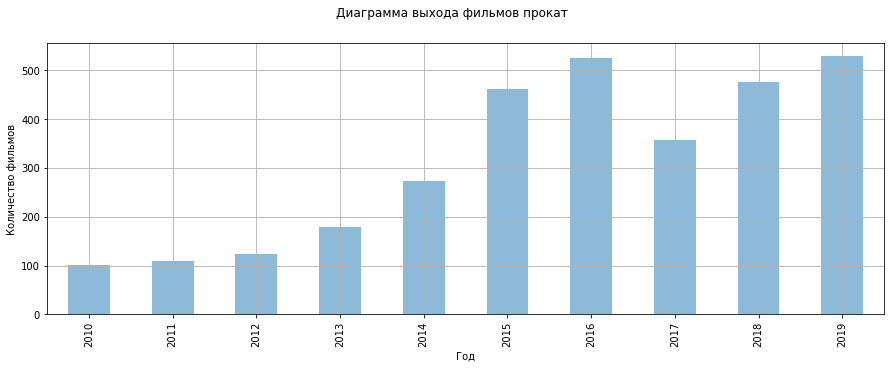

In [74]:
data_pivot.plot(kind='bar', y='Вышло в прокат', figsize=(15, 5), grid=True, legend=False, alpha=0.5);
plt.ylabel('Количество фильмов')
plt.suptitle('Диаграмма выхода фильмов прокат')
plt.xlabel('Год')
plt.show()

Начиная с 2010 был заметен рост количества фильмов, которым выдавались прокатные удостоверения в целом, в 2017 был резкий спад, а к 2019 значения вернулись в норму 2016 год.

Спад мог быть частично связан с тем, что стриминговая площадка Netflix в 2017 добавила в свой сервис многоязычные субтитры, что открыло значительной доле русскоязычных зрителей доступ к довольно большой библиотеке фильмов. В 2017 году был принят закон, который вводил новые правила выдачи прокатных удостоверений, что могло сильно повлиять на количество выдаваемых прокатных удостоверений. Также в 2017 был скачок инфляции и это сильно сказалось на ценах на билеты, и значительно ограничило количество посещений и как следствие сборы. Еще отмечу, что в 2017 году в России произошли изменения в системе финансирования кинопроектов, в результате чего многие кинокомпании столкнулись с финансовыми трудностями.

Эти предположения невозможно доказать в рамках этого исследования, но информация о них доступна в открытых источниках, так что оставлю их как дополнительный комментарий, который требует отдельной проработки и детального изучения.

Определим какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [75]:
display('Общая доля фильмов с информацией о прокате в кинотеатре составляет %:', round(data.query('box_office > 0')['box_office'].count() / data['box_office'].count() * 100, 2))

'Общая доля фильмов с информацией о прокате в кинотеатре составляет %:'

41.87

#### Изучим динамику проката по годам

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Посмотрим на изменение суммы сборов в разрезе каждого отдельного года.

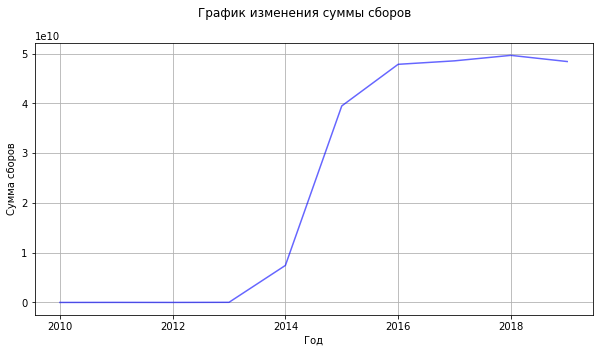

In [76]:
data_pivot.plot(kind='line', y='Сумма', figsize=(10, 5), legend=False, grid=True, color='blue', alpha=0.6)
plt.ylabel('Сумма сборов')
plt.suptitle('График изменения суммы сборов')
plt.xlabel('Год')
plt.show()

Минимальные сборы были в:

In [77]:
data_pivot['Сумма'].idxmin()

2010

Максимальные сборы были в:

In [78]:
data_pivot['Сумма'].idxmax()

2018

С увеличением производимых кинолент, естественно выросли и суммы сборов как в качественном эквиваленте, так и в количественном.

#### Медианная и средняя сумма сборов в рублях для каждого года

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Посмотрим на среднее и медианное значение по каждому году отдельно.

In [79]:
display(data_pivot.loc[:, ['Среднее', 'Медиана']])

,Среднее,Медиана
show_start_year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


Отобразим в графическом виде для наглядности.

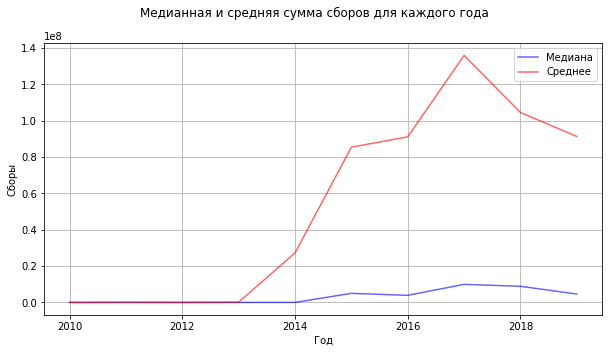

In [80]:
data_pivot.plot(kind='line', y=['Медиана', 'Среднее'], figsize=(10, 5), legend=True, grid=True, color=['blue','red'], alpha=0.6)
plt.ylabel('Сборы')
plt.suptitle('Медианная и средняя сумма сборов для каждого года')
plt.xlabel('Год')
plt.show()

Динамика сохраняется, начиная с 2010 по 2019 суммы за сборы естественно увеличивались. Не смотря на изменение среднего за эти годы, медианное значение так и осталось не очень большим.

#### Влияние возрастного ограничения на сборы

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Посмотрим на то, как влияет возрастное ограничение аудитории «6+», «12+», «16+», «18+» и «0+» на сборы фильма и влияет ли. Данные будем анализировать за промежуток с 2015 по 2019 год.

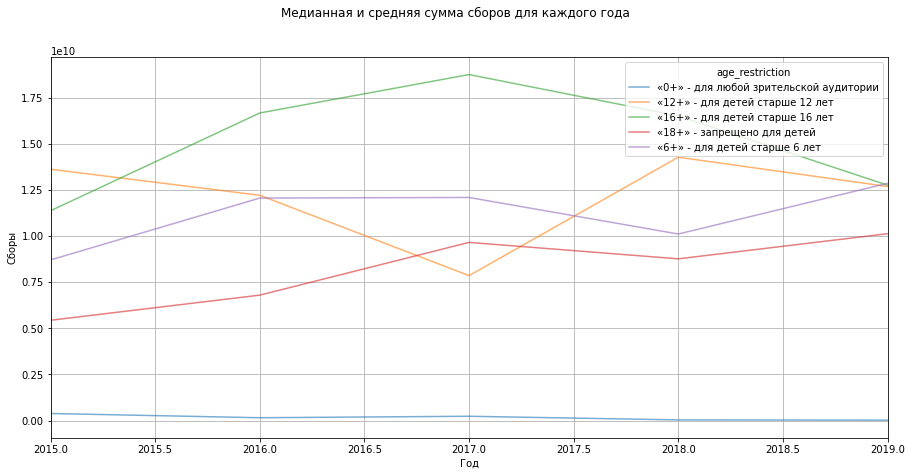

In [81]:
data_check_age = data.query('box_office > 0').pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum')

(data_check_age.plot(kind='line', xlim=[2015, 2019], figsize=(15, 7), legend=True, grid=True, alpha=0.6))
plt.ylabel('Сборы')
plt.suptitle('Медианная и средняя сумма сборов для каждого года')
plt.xlabel('Год')
plt.show()

Посмотрим на суммарные данные по категориям и подведем итог в строке Total.

In [82]:
col_sum = data_check_age.sum(axis=0)
data_check_age = data_check_age.append(pd.Series(col_sum, name='Total'))
data_check_age.rename(
    columns = {
    '«0+» - для любой зрительской аудитории':'«0+»', 
    '«12+» - для детей старше 12 лет':'«12+»',
    '«16+» - для детей старше 16 лет':'«16+»',
    '«18+» - запрещено для детей':'«18+»',
    '«6+» - для детей старше 6 лет':'«6+»',
    }, inplace = True 
)
data_check_age

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
show_start_year,,,,,
2010,1887611.00,120146.00,366512.00,54385.00,NaN
2011,13499871.00,219891.00,381513.00,1040.00,450.00
2012,2266483.00,108734.00,3254216.00,182580.00,1143410.00
2013,2710302.50,20910336.50,658069.60,5161245.60,359752.00
2014,375562258.20,2584782324.00,544280086.70,2209712746.90,1730614443.40
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41


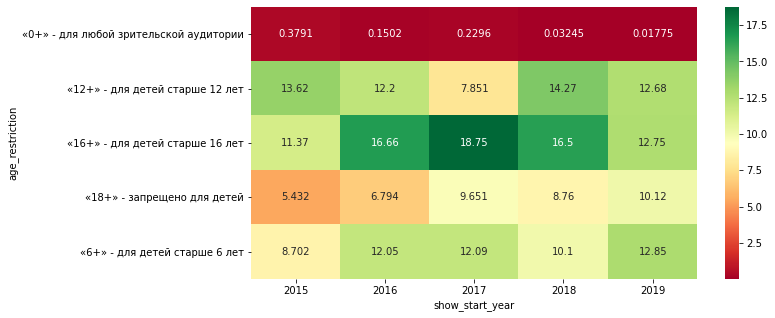

In [83]:
age_pt = data.query('show_start_year >= 2015')
age_pt = age_pt.pivot_table(index = 'age_restriction', values = 'box_office', \
                   columns = 'show_start_year', aggfunc = {'box_office' : sum}) / 1000000000
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(age_pt, annot=True, cmap='RdYlGn', fmt ='.4g');

In [84]:
display('Минимальная сумма по категориям:, {}, рублей' .format(round(col_sum.min(), 2)))

'Минимальная сумма по категориям:, 1205003951.67, рублей'

В прокате фильмы с возрастным ограничением «0+» - для любой зрительской аудитории набрали меньше всего средств.

In [85]:
display('Максимальная сумма по категориям:, {}, рублей' .format(round(col_sum.max(), 2)))

'Максимальная сумма по категориям:, 76583674040.93, рублей'

А больше всего средств собрали фильмы с возрастным ограничением «16+» — для детей старше 16 лет.

На графике видно, что фильмы «16+» три года подряд лидировали по сборам, в то время как в других нишах был либо спад, либо не очень заметные изменения. Только в 2019 году первое место по сборам заняли фильмы «6+» и то с небольшой разницей.

Это может быть связано с тем, что фильмы «16+» за эти года, после своего пика в 2017 начали терять аудиторию, возможно из-за перенасыщения рынка. Также можно предположить что начиная с 2017 года, популярность начали набирать фильмы «12+», фильмы, которые так или иначе частично делят сегмент аудитории с фильмами «16+», что привело к спаду в категории фильмов «16+».

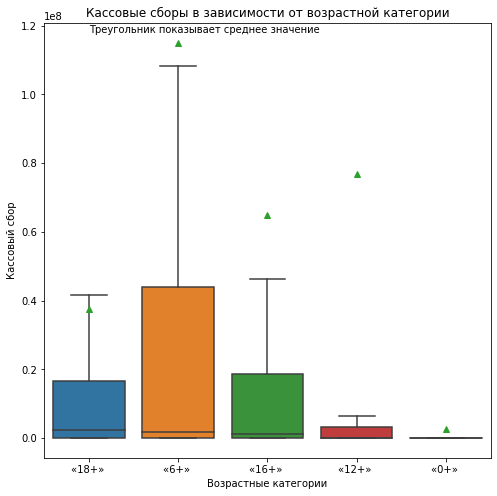

In [104]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['show_start_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 1.18e8,'Треугольник показывает среднее значение')
plt.show()

#### Общий вывод. Исследовательский анализ данных

Из рассмотренных данных и полученных результатов можно сделать вывод, что киноиндустрия за период с 2010 по 2019 годы продолжала развиваться и расти, с увеличением производства фильмов и суммы затрат.

Однако, наблюдался резкий спад количества фильмов, получивших прокатные удостоверения в 2017 году. По сборам лидерами являлись фильмы «16+», но после 2017 года они начали терять аудиторию, возможно из-за перенасыщения рынка и конкуренции со стороны фильмов «12+». В 2019 году первое место по сборам заняли фильмы «6+», что может свидетельствовать о том, что вкусы и предпочтения зрителей меняются со временем. Например, увеличение интереса к фильмам «6+» может быть связано с тенденцией к семейным ценностям и приоритетам, таким как укрепление семьи и отношений между родителями и детьми. Кроме того, существенное влияние на выбор зрителей может оказывать качество фильмов и их сценарий, а также качество продвижения и рекламы фильмов.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Посмотрим на фильмы, которые получали государственную поддержку через параметр сборов, сколько собрано в целом, на какие фильмы, на какие жанры, а также проверим рейтинги у фильмов с государственной поддержкой и без нее.

Посмотрим на информацию о общих сборах.

In [86]:
mean_median_min_max(data, 'box_office')

'Среднее значение для столбца: box_office'

32267163.99

'Медианное значение для столбца: box_office'

0.0

'Минимальное значение для столбца: box_office'

0.0

'Максимальное значение для столбца: box_office'

3073568690.79

Посмотрим подробнее на параметр сборов исключив из него отсутствующие данные в представлении гистограммы. Поставим количество корзин 100, чтобы немного подробнее посмотреть на значения.

Text(0.5, 0, 'Размер сборов')

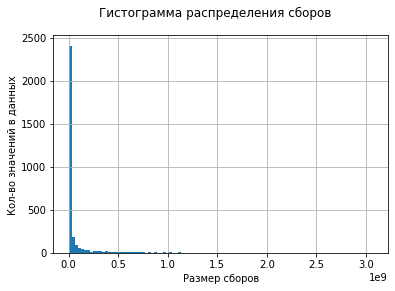

In [87]:
data.query('box_office > 0')['box_office'].hist(bins=100);
plt.ylabel('Кол-во значений в данных')
plt.suptitle('Гистограмма распределения сборов')
plt.xlabel('Размер сборов')

Сборов в крупных суммах было очень немного. Судя по графиках преобладают сборы до 500 000 рублей, но большая часть сборов все равно довольно мала.

Посмотрим на количество снятых при поддержке Министерства культуры или Фонда кино фильмов, отдельно для тех, у которых есть сборы, а отдельно без сборов.

In [88]:
list_sponsor = ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
display('Проекты сняты при поддержке Министерства культуры или Фонда кино без информации о сборах', data.query('budget != 0 and box_office == 0  and financing_source in @list_sponsor' )['title'].count())
display('Проекты сняты при поддержке Министерства культуры или Фонда кино с информацией о сборах', data.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor' )['title'].count())

'Проекты сняты при поддержке Министерства культуры или Фонда кино без информации о сборах'

14

'Проекты сняты при поддержке Министерства культуры или Фонда кино с информацией о сборах'

318

Так как последняя дата, которая зафиксирована в данных это 30 декабря 2019 года, стоит предположить, что на эту дату могли попасть фильмы недавно стартовавшие и без информации о сборах. Допустим, что за два месяца и более после даты старта фильма, данные о сборах уже есть, так что исключим фильмы, которые были запущены в прокат после 30 октября 2019 года.

In [89]:
data.query('budget != 0 and box_office == 0 and financing_source in @list_sponsor and show_start_date < "2019-10-30 12:00:00+00:00" ' )

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genres,show_start_year,main_director,gov_support_percent
2799,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,25000000.00,41998984.00,Министерство культуры,6.30,драма,0.00,драма,2015,А.Галибин,59.53
3336,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,10000000.00,61000000.00,Министерство культуры,5.20,мелодрама,0.00,мелодрама,2017,А.Сурикова,16.39
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,11520000.00,18706080.00,Министерство культуры,7.00,"мультфильм,приключения,детектив",0.00,мультфильм,2016,А.Романец,61.58
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,25000000.00,44600000.00,Министерство культуры,7.20,"детский,комедия",0.00,детский,2017,Е.Соколов,56.05
6475,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,25000000.00,39700000.00,Министерство культуры,5.20,"драма,криминал",0.00,драма,2019,С.Черников,62.97
6708,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,А.Золотухин,«12+» - для детей старше 12 лет,0.00,30000000.00,46941140.00,Министерство культуры,6.10,"драма,военный,история",0.00,драма,2019,А.Золотухин,63.91
6967,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,40000000.00,61571449.00,Министерство культуры,5.80,"драма,история,биография",0.00,драма,2019,Ю.Разыков,64.97
7008,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,25000000.00,60668576.00,Министерство культуры,4.90,"драма,криминал,детектив",0.00,драма,2019,П.Левченко,41.21


Список включает в себя разные года и какой-то особой тенденции в пропусках данных о сборах нет, учитывая, что у фильмов есть рейтинг, то они точно выходили в прокат. Скорее всего данные просто пропущены.

In [90]:
display('Медиана по выделяемому бюджету на фильмы руб.: ', data.query('budget != 0')['budget'].median())

'Медиана по выделяемому бюджету на фильмы руб.: '

74592550.0

Очень много сумм сборов относительно скромные. Так как медианная сумма по размеру бюджета 74 592 550 рублей, посмотрим на количество фильмов, которые ниже этой границы по сборам.

In [91]:
display('Сборов до медианы по выделяемому бюджету: ', data.query('budget != 0 and box_office < 74592550 and financing_source in @list_sponsor')['box_office'].sort_values(ascending=True).nunique())

'Сборов до медианы по выделяемому бюджету: '

221

Фильмов, которые сняты при поддержке Министерства культуры или Фонда кино и получили сборов меньше медианного значения выделяемого бюджета — 221, это 69.5% от общей информации о сборах, которая у нас есть. Судя по всему доходы у выпускаемых фильмов, которые были на господдержке были очень скромные.

Чтобы разобраться со сборами и получить как можно больше информации об этом параметре, обратимся к распределению по категориям и вычислению процентов от общего количества данных, а затем посмотрим на доходы в разрезе по типам фильмов.

Сборы можно поделить на пять основных условных категорий:

* провал - сборы фильма не покрыли даже бюджет производства;
* убыток - сборы фильма покрыли только бюджет производства, но не принесли прибыли;
* средний успех - сборы фильма превысили бюджет производства, но не достигли уровня ожидаемой прибыли;
* хороший успех - сборы фильма превысили бюджет производства и достигли или превысили ожидаемую прибыль;
* кассовый успех - сборы фильма значительно превысили бюджет производства и принесли огромную прибыль.
Для категоризации поделим цены с помощью метода .quantile() и шага 20%. цена:

* провал: 0-20%
* убыток: 21-40%
* средний успех: 41-60%
* хороший успех: 61-80%
* кассовый успех: 81-100%

In [92]:
data.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor')['box_office'].quantile([.20, .40, .60, .80])

0.20      725984.10
0.40     5789606.54
0.60    37480267.37
0.80   150860738.64
Name: box_office, dtype: float64

In [93]:
bins = [0, 725984.10, 5789606.54, 37480267.37, 150860738.64, float('inf')]
labels = ['провал', 'убыток', 'средний успех', 'хороший успех', 'кассовый успех']
data['category'] = pd.cut(data['box_office'], bins=bins, labels=labels)

Посмотрим на процент по каждой категории.

In [94]:
sort_category(data, 'category', 'box_office')

,Количество в box_office,Процент от общего
category,,
провал,1131,36.09
убыток,785,25.05
средний успех,544,17.36
кассовый успех,355,11.33
хороший успех,319,10.18


Доля провальных и убыточных фильмов крайне велика, суммарно это 61.14% от всех количества всех данных о сборах.

Построим диаграмму в зависимости от определенных ранее категорий и типов, которые указаны в данных.

Text(0.5, 0.98, 'Диаграмма распределения суммы сборов')

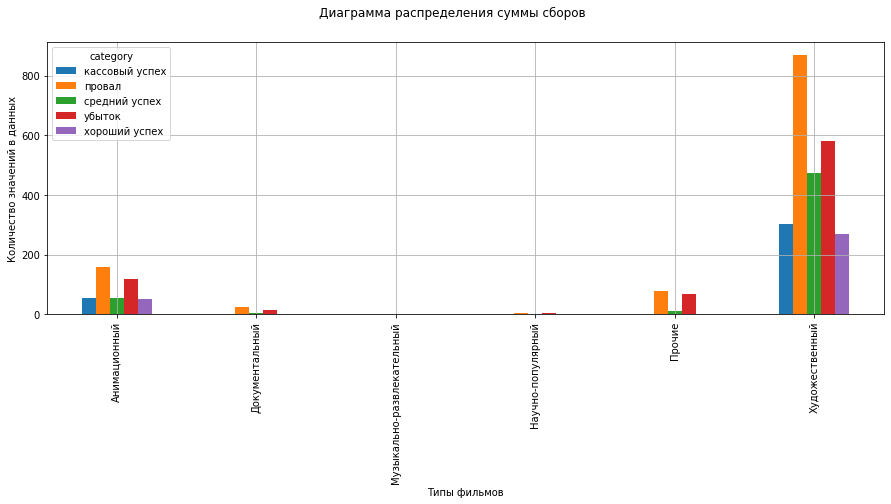

In [95]:
counts_hist(data, 'category', 'bar')
plt.suptitle('Диаграмма распределения суммы сборов')

Больше всего в российских кинотеатрах было художественных фильмов, которые провалились в прокате. Анимационные фильмы также преимущественно были провальными по сборам.

Посмотрим на расходы по жанрам в виде сводной таблицы, отдельно выясним какие жанры были убыточны, а какие наоборот окупали себя.

In [96]:
data_budget_box_office_pivot = (data.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor and ratings != 0')
                    .pivot_table(index='main_genres', values=['ratings', 'box_office', 'budget'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_budget_box_office_pivot = data_budget_box_office_pivot.reindex(['ratings', 'budget', 'box_office'], axis=1)
data_budget_box_office_pivot['percent_box'] = round((data_budget_box_office_pivot['box_office'] / data_budget_box_office_pivot['box_office'].sum()) * 100, 2) 
data_budget_box_office_pivot['percent_budget'] = round((data_budget_box_office_pivot['budget'] / data_budget_box_office_pivot['budget'].sum()) * 100, 2)  
data_budget_box_office_pivot = data_budget_box_office_pivot.set_axis(['Рейтинг', 'Сборы', 'Бюджет','Сборы процент', 'Бюджет процент'], axis='columns')

Для удобного восприятия выведу результаты в цветовом представлении.

Ключ к данным:

* зеленые ячейки — жанры, в которых сборы больше затраченного бюджета;
* оранжевые — сборы у которых сумма меньше бюджета.

In [97]:
def highlight_cells(x, alpha=1.0):
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    df_color.loc[x['Сборы процент'] < x['Бюджет процент'], ['Сборы процент', 'Бюджет процент', 'Сборы', 'Бюджет']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Сборы процент'] > x['Бюджет процент'], ['Сборы процент', 'Бюджет процент', 'Сборы', 'Бюджет']] = f'background-color: rgba(143, 188, 143, {alpha})'
    df_color.loc[(x['Рейтинг'] < 5) & (x['Рейтинг'] > 0), ['Рейтинг']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Рейтинг'] >= 5 , ['Рейтинг']] = f'background-color: rgba(255, 222, 173, {alpha})'
    df_color.loc[x['Рейтинг'] >= 7.5 , ['Рейтинг']] = f'background-color: rgba(143, 188, 143, {alpha})'
    return df_color 

data_budget_box_office_pivot.style.apply(highlight_cells, alpha=0.5, axis=None)

,Рейтинг,Сборы,Бюджет,Сборы процент,Бюджет процент
main_genres,,,,,
биография,6.900000,176311212.333333,172294345.880000,5.640000,5.000000
боевик,6.583333,122430724.830601,99321489.083333,3.250000,3.480000
военный,6.466667,142878536.111111,113074496.866667,3.700000,4.060000
детектив,6.760000,239644459.400000,27709502.280000,0.910000,6.800000
детский,7.100000,46432668.000000,1004550.666667,0.030000,1.320000
драма,6.468966,125032222.513473,109090162.080920,3.570000,3.550000
история,5.350000,536265551.500000,363867058.642500,11.910000,15.220000
комедия,5.528767,84255962.734786,170958595.264795,5.600000,2.390000
криминал,7.500000,142198260.333333,79931287.666667,2.620000,4.040000


Похоже, что хорошо идут фильмы про:

* спорт — из всех полученных сборов 31.37% пришлось именно на эту категорию, это при том, что из всех выделяемых средств на фильмы о спорте было выделено всего 6.58% от общего бюджета;
* мультфильмы — разница между выделенной долей бюджета и сборами не очень велика, 5.68% против 5.94%, но она есть;
* биографические фильмы — тут также есть прибыль, получено 5.46%, а выделено от общего бюджета 4.90%;
* комедии — сборы 5.42% от общей суммы, а затрачено всего 2.34% от общего бюджета;
* семейные — сборы 3.09% от общей суммы, а затрачено 2.80% от общего бюджета;
* ужасы сборы 2.25% от общей суммы сборов, а затрачено из общего бюджета 1.57%;
* фантастика — сборы 5.45% от общей суммы сборов, а затрачено из общего бюджета 4.61%.

Остальные жанры получили довольно скромные доходы, которые не покрыли даже расходы на бюджет.

Отдельно отмечу, что фильмы про спорт это однозначный успех, сборы у таких фильмов в несколько раз больше затраченного бюджета.

Соберем данные по рейтингу среди остальных фильмов, которые не спонсировались Министерством культуры и Фондом кино.

In [98]:
data_raitings_without_gs_pivot = (data.query('financing_source not in @list_sponsor')
                    .pivot_table(index='main_genres', values=['ratings'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_raitings_without_gs_pivot = data_raitings_without_gs_pivot.set_axis(['Рейтинг фильмов без господдержки'], axis='columns')

data_raitings_gs_pivot = (data.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor and ratings != 0')
                    .pivot_table(index='main_genres', values=['ratings'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_raitings_gs_pivot = data_raitings_gs_pivot.set_axis(['Рейтинг фильмов с господдержкой'], axis='columns')

data_raitings_merge = data_raitings_without_gs_pivot.merge(data_raitings_gs_pivot, on='main_genres', how='right')


def highlight_cells(x, alpha=1.0):
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    df_color.loc[x['Рейтинг фильмов без господдержки'] > x['Рейтинг фильмов с господдержкой'], ['Рейтинг фильмов без господдержки']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Рейтинг фильмов с господдержкой'] > x['Рейтинг фильмов без господдержки'], ['Рейтинг фильмов с господдержкой']] = f'background-color: rgba(143, 188, 143, {alpha})'
    return df_color

data_raitings_merge.style.apply(highlight_cells, alpha=0.5, axis=None)

,Рейтинг фильмов без господдержки,Рейтинг фильмов с господдержкой
main_genres,,
биография,7.023333,6.900000
боевик,6.508183,6.583333
военный,6.789189,6.466667
детектив,6.635294,6.760000
детский,5.945833,7.100000
драма,6.787524,6.468966
история,6.631818,5.350000
комедия,6.038042,5.528767
криминал,6.630556,7.500000


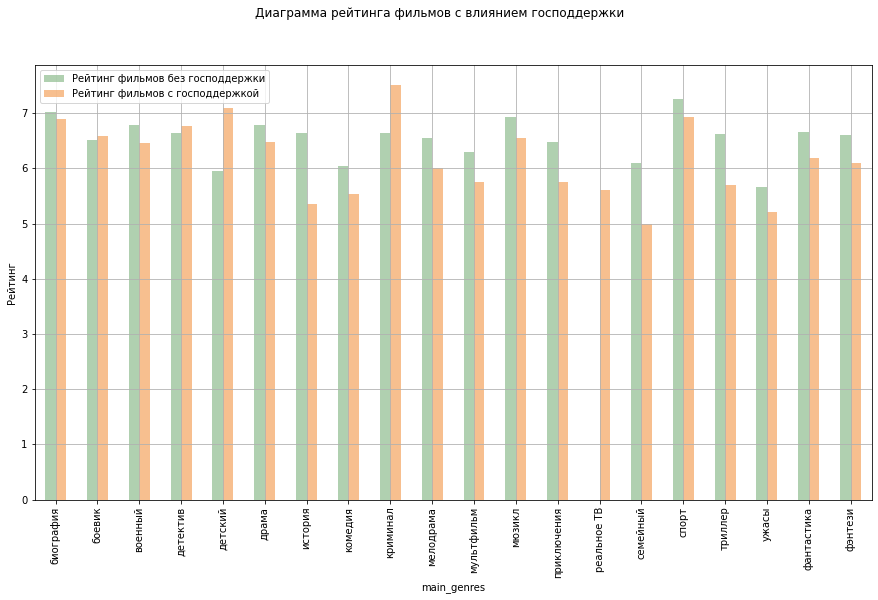

In [99]:
data_raitings_merge.plot(kind='bar', color=['DarkSeaGreen', 'SandyBrown'], figsize=(15, 8), grid=True, legend=True, alpha=0.7)
plt.ylabel('Рейтинг')
plt.suptitle('Диаграмма рейтинга фильмов с влиянием господдержки')
plt.show()

Посмотрев на данные фильмов, которые снимались при государственной поддержке, можно выделить только несколько жанров, в которых медианный рейтинг выше чем у фильмов, которые снимались на частные деньги в России или у зарубежных фильмов, это:

* боевики — 6.58 против 6.50;
* детективы — 6.76 против 6.63;
* детские — 7.10 против 5.94;
* криминал — 7.50 против 6.63.

По соотношению количества жанров с преобладающим рейтингом все не очень хорошо, высоких рейтингов всего 4 из 19 возможных.

Так как исследование проводится по фильмам, которые спонсирует Министерство культуры и Фонд кино России, следует посмотреть на данные фильмов, которые произведены в России и которые не получали поддержку государства, а затем сравнить эти данные с данными о фильмах с государственным спонсированием.

In [100]:
data_raitings_russia_pivot = (data.query('financing_source not in @list_sponsor and production_country == "Россия" ')
                    .pivot_table(index='main_genres', values=['ratings', 'box_office'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_raitings_russia_pivot = data_raitings_russia_pivot.reindex(['ratings', 'box_office'], axis=1)
data_raitings_russia_pivot = data_raitings_russia_pivot.set_axis(['Рейтинг фильмов без спонсирования. Россия', 'Средние сборы без спонсирования. Россия'], axis='columns')

data_raitings_russia_gs_pivot = (data.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor and production_country == "Россия" and ratings != 0')
                    .pivot_table(index='main_genres', values=['ratings', 'box_office'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_raitings_russia_gs_pivot = data_raitings_russia_gs_pivot.reindex(['ratings', 'box_office'], axis=1)
data_raitings_russia_gs_pivot = data_raitings_russia_gs_pivot.set_axis(['Рейтинг фильмов со спонсированием. Россия', 'Средние сборы со спонсированием. Россия'], axis='columns')

data_raitings_russia_merge = data_raitings_russia_pivot.merge(data_raitings_russia_gs_pivot, on='main_genres', how='right')
data_raitings_russia_merge = data_raitings_russia_merge.reindex(['Рейтинг фильмов без спонсирования. Россия', 'Рейтинг фильмов со спонсированием. Россия', 'Средние сборы без спонсирования. Россия', 'Средние сборы со спонсированием. Россия'], axis=1)

def highlight_cells(x, alpha=1.0):
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    df_color.loc[x['Рейтинг фильмов без спонсирования. Россия'] > x['Рейтинг фильмов со спонсированием. Россия'], ['Рейтинг фильмов без спонсирования. Россия']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Рейтинг фильмов со спонсированием. Россия'] > x['Рейтинг фильмов без спонсирования. Россия'], ['Рейтинг фильмов со спонсированием. Россия']] = f'background-color: rgba(143, 188, 143, {alpha})'
    
    df_color.loc[x['Средние сборы без спонсирования. Россия'] > x['Средние сборы со спонсированием. Россия'], ['Средние сборы без спонсирования. Россия']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Средние сборы со спонсированием. Россия'] > x['Средние сборы без спонсирования. Россия'], ['Средние сборы со спонсированием. Россия']] = f'background-color: rgba(143, 188, 143, {alpha})'
    return df_color

data_raitings_russia_merge.style.apply(highlight_cells, alpha=0.5, axis=None)

,Рейтинг фильмов без спонсирования. Россия,Рейтинг фильмов со спонсированием. Россия,Средние сборы без спонсирования. Россия,Средние сборы со спонсированием. Россия
main_genres,,,,
биография,6.811111,6.600000,10056933.201111,57539287.870000
боевик,6.278947,6.440000,6679187.410526,57655658.052000
военный,6.284615,6.425000,22135996.551538,120745685.725000
детектив,6.323529,6.760000,53164252.274706,27709502.280000
детский,5.921739,7.100000,57608.304348,1004550.666667
драма,6.551613,6.477500,2393919.577312,117514032.109500
история,5.890000,5.350000,12497392.999000,363867058.642500
комедия,5.593143,5.545833,35499778.839886,173322743.282361
криминал,6.483333,7.500000,6073711.010000,79931287.666667


Если рассматривать итог сравнения российских фильмов с господдержкой и без нее, то общее представление о кинематографе России станет более оптимистичным. Рейтинги у обоих категорий поделились примерно пополам.

Так фильмы с господдержкой лидируют в:

* боевиках — рейтинг 6.44 против 6.28 у фильмов без господдержки;
* военных — рейтинг 6.43 против 6.28;
* детективах — рейтинг 6.76 против 6.32;
* детских — рейтинг 7.10 против 5.86;
* криминальных — рейтинг 7.50 против 6.48;
* мелодраммах — рейтинг 5.99 против 5.90;
* мультфильмах — рейтинг 5.76 против 5.66;
* приключениях — рейтинг 5.74 против 5.64;
* фентези — рейтинг 6.09 против 6.08.

Лучше всего получаются детские фильмы, которые снимают при поддержке государства, рейтинг таких фильмов в среднем 7.10, а у коммерческих 5.86, возможно это связано с тем, что государство делает упор на развитие мультипликации в рамках программы заботы о детях и детстве.

Если сравнивать коммерческие фильмы по ощутимому перевесу в рейтинге, то лучше всего у частных проектов получаются:

* мюзиклы — рейтинг 7.83 против 6.55 у фильмов с господдержкой;
* семейные — рейтинг 6.08 против 4.98;
* фантастика — рейтинг 6.45 против 6.19. В остальных жанрах — ужасы, триллер, спорт, комедия, история, драма и биография, разница в пользу коммерческих фильмов в рейтинге не особо большая, но она есть.

Если смотреть по сборам, то фильмы снятые по госпрограмме суммарно собирают больше, чем коммерческие проекты. Возможно это связано с тем, что бюджеты, реклама и прочее продвижение для фильмов по госпрограмме более обширно, и такие фильмы получают лучшее эфирное время для рекламы на тв, например.

Интересный момент, детективы на коммерческой основе получили сборов больше, хотя, рейтинги у государственных детективных фильмов выше.

### Шаг 5. Напишите общий вывод

Общий вывод
В первой части проекта была выполнена важная работа по предварительной обработке данных. Очистка данных является важным этапом в процессе анализа данных. Это позволяет убрать ошибки и пропуски в данных, чтобы получить более точные и релевантные результаты. Различные вариации записи в данных могут затруднять их анализ и сравнение. Поэтому, важно проводить стандартизацию данных, убирая разные варианты написания, что позволит сократить количество ошибок в будущем. Определение значимых параметров для анализа данных также является важным шагом.

Киноиндустрия является одной из наиболее динамичных и значимых отраслей в мировой экономике. С 2010 по 2019 годы отрасль продемонстрировала значительный рост в производстве и количестве выходящих фильмов, а также в затратах на их производство. В частности, количество фильмов, которые выходили в прокат, увеличилось примерно в 5 раз, а затраты на производство кинолент существенно выросли.

При этом можно отметить, что начиная с 2010 года, был заметен рост количества фильмов, которым выдавались прокатные удостоверения в целом. Однако, в 2017 году произошел резкий спад, который был связан с некоторыми проблемами внутри отрасли, в том числе с качеством фильмов и низкими сборами. К 2019 году значения количества выходящих фильмов и затрат на их производство вернулись к уровню 2016 года.

Спад по количеству выдаваемых прокатных удостоверений и уменьшению сборов в России в 2017 и 2018 годах можно связать с несколькими факторами.

Во-первых, на этот период пришелся скачок инфляции, что привело к росту цен на билеты в кинотеатрах. Это могло снизить спрос на кино и привести к сокращению выдачи прокатных удостоверений.
Во-вторых, в 2017 году был принят закон, который вводил новые правила выдачи прокатных удостоверений и требовал большей прозрачности в работе кинокомпаний. Это могло привести к снижению количества выдаваемых удостоверений в связи с изменением условий работы.
В-третьих, в этот период происходили изменения в налоговом законодательстве, которые могли повлиять на финансовую устойчивость кинокомпаний.
Наконец, следует отметить, что в 2017 году в России произошли изменения в системе финансирования кинопроектов, в результате чего многие кинокомпании столкнулись с финансовыми трудностями, что могло сказаться на количестве производимых фильмов и выдаче прокатных удостоверений.
Что касается непосредственно самих фильмов, а не индустрии в целом.

Можно сделать вывод, что в течение трех лет подряд c 2016 по 2018 фильмы «16+» были лидерами по сборам в кинотеатрах, тогда как другие категории испытывали спад или не очень заметные изменения. Однако в 2019 году первое место по сборам заняли фильмы «6+» с небольшим отрывом. Вероятно, это связано с тем, что фильмы «16+» после пика в 2017 году начали терять аудиторию, возможно, из-за перенасыщения рынка. Кроме того, начиная с 2017 года, популярность набирают фильмы «12+», которые частично делят сегмент аудитории с фильмами «16+», что также могло привести к снижению интереса к фильмам в этой категории. Из анализа данных о фильмах, выпущенных в российский прокат с 2010 по 2019 год, следует, что большинство художественных фильмов не смотря на то, что занимали лидирующую позицию по прокатам, не смогли окупить свои бюджеты, а многие анимационные фильмы также оказались провальными. Однако, в то же время, фильмы про спорт, биографические фильмы, мультфильмы, комедии, семейные фильмы, ужасы и фантастика показали сравнительно хорошие результаты в сборах и относительно малый разрыв между выделенными на них бюджетами и сборами за все время. В частности, фильмы про спорт оказались одними из наиболее прибыльных жанров за все время, принося 31,37% от общих сборов при затрате только 6,58% от общего бюджета.

Однако, данные также показывают, что фильмы, снятые при государственной поддержке, не всегда показывают высокие результаты. Медианные рейтинги таких фильмов по большинству жанров ниже, чем у фильмов, снятых на частные деньги в России или зарубежных фильмов. Из всего спектра жанров, фильмы-боевики, детективы, детские фильмы и криминальные фильмы с государственной поддержкой оказались более высоко оцененными по сравнению с аналогичными жанрами фильмов, снятых на частные деньги в России или зарубежных фильмов. Однако количество жанров с преобладающим рейтингом все еще невысоко, только 4 из 19 возможных.

Результаты сравнения российских фильмов с государственной поддержкой и без нее говорят о том, что общее впечатление о кинематографе России становится более оптимистичным. Рейтинги фильмов в обеих категориях распределились примерно поровну. Фильмы, получившие государственную поддержку, имеют не очень большой но перевес по рейтингу но он есть в боевиках, военных, детективах, детских, криминальных, мелодрамах, мультфильмах, приключениях и фэнтези. Особенно хорошо снимаются детские фильмы с господдержкой, которые имеют рейтинг в среднем 7.10, в то время как коммерческие фильмы имеют рейтинг 5.86. Это может быть связано с тем, что государство делает упор на развитие мультипликации в рамках программы заботы о детях и детстве. Если рассматривать коммерческие фильмы, которые имеют ощутимый перевес в рейтинге, то лучше всего получаются мюзиклы, семейные фильмы и фантастика. В остальных жанрах разница в рейтинге между коммерческими и государственными фильмами не очень большая, но она есть. Однако, если смотреть на сборы, то фильмы, снятые по государственной программе, суммарно собирают больше, чем коммерческие проекты. Возможно, это связано с тем, что бюджеты, реклама и продвижение для фильмов, снятых по государственной программе, более обширны. Кроме того, такие фильмы получают лучшее эфирное время для рекламы на телевидении, например.

Интересно отметить, что хотя рейтинги государственных детективных фильмов выше, фильмы этого жанра, снятые на коммерческой основе, получили больше сборов.